In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Boxplot before Removing Outlier

In [3]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)

list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df


,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-46.0,-17.666667,-6.333333,-3.444444,-2.750000,-2.333333,-1.944444,-1.285714,-5.020408
1,-36.0,-13.000000,-5.666667,-3.111111,-2.333333,-2.200000,-1.666667,-1.190476,-3.551020
2,-36.0,-12.000000,-4.833333,-3.111111,-1.500000,-2.000000,-1.555556,-0.714286,-2.857143
3,-26.0,-9.000000,-4.833333,-2.666667,-1.500000,-1.533333,-1.555556,-0.476190,-2.653061
4,-26.0,-8.000000,-3.166667,-2.333333,-1.333333,-1.533333,-1.555556,-0.476190,-2.530612
...,...,...,...,...,...,...,...,...,...
995,32.0,6.666667,3.000000,2.000000,1.500000,1.533333,1.333333,1.619048,1.959184
996,32.0,7.333333,3.333333,2.222222,1.500000,1.533333,1.333333,1.857143,1.959184
997,32.0,7.333333,3.833333,2.222222,1.750000,1.733333,1.722222,1.857143,1.959184
998,36.0,7.333333,3.833333,2.222222,1.916667,2.066667,1.722222,1.857143,1.959184


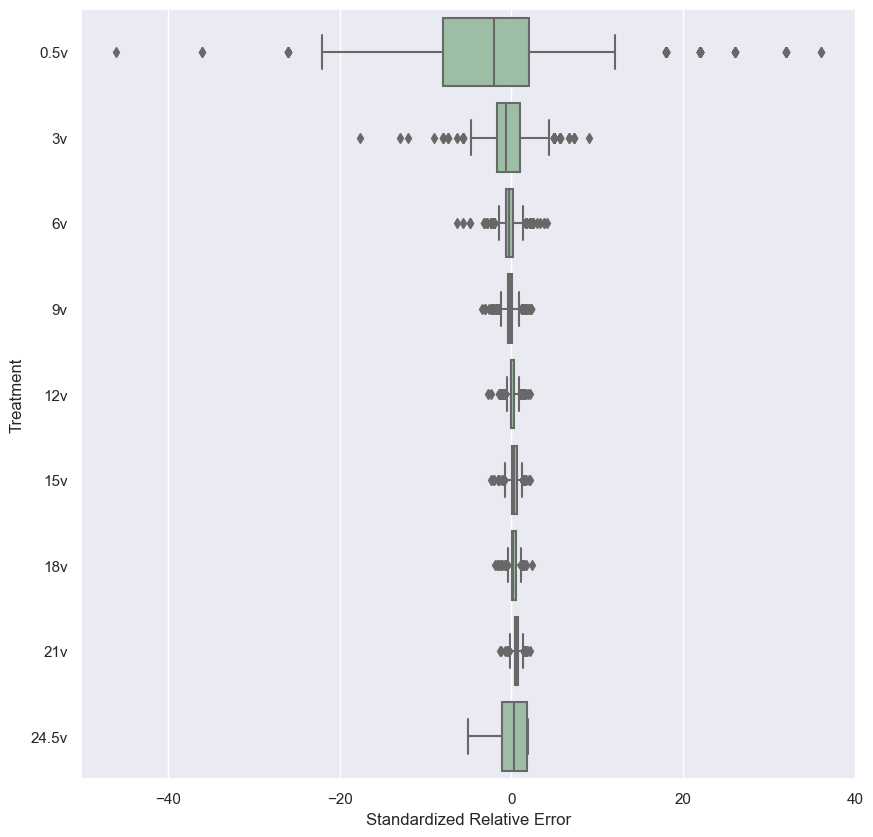

In [4]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

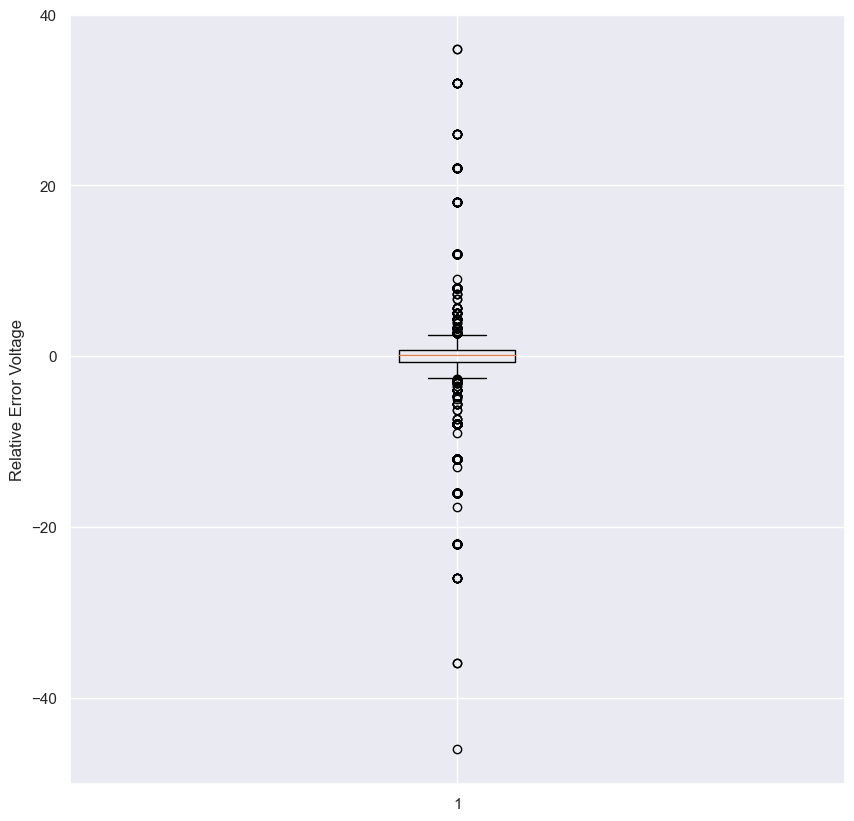

In [5]:
plt.boxplot(df_melt['value'])
plt.ylabel('Relative Error Voltage')

# Removing Based on Standard Deviation

In [10]:
print(f"Removing from : {df_melt['value'].mean() + df_melt['value'].std()} to {df_melt['value'].mean() - df_melt['value'].std()}")

Removing from : 3.559948279454203 to -3.985578387793834


In [25]:
df_melt_remove = df_melt.drop(df_melt[
    (df_melt['value'] > df_melt['value'].mean() + df_melt['value'].std()) | 
    (df_melt['value'] < df_melt['value'].mean() - df_melt['value'].std())
].index)
df_melt_remove = df_melt_remove.reset_index()

df_melt_remove.to_csv('../docs 2nd Approach/remove_outlier_whole_std.csv', index=False)

In [29]:
len(df_melt_remove)

8267

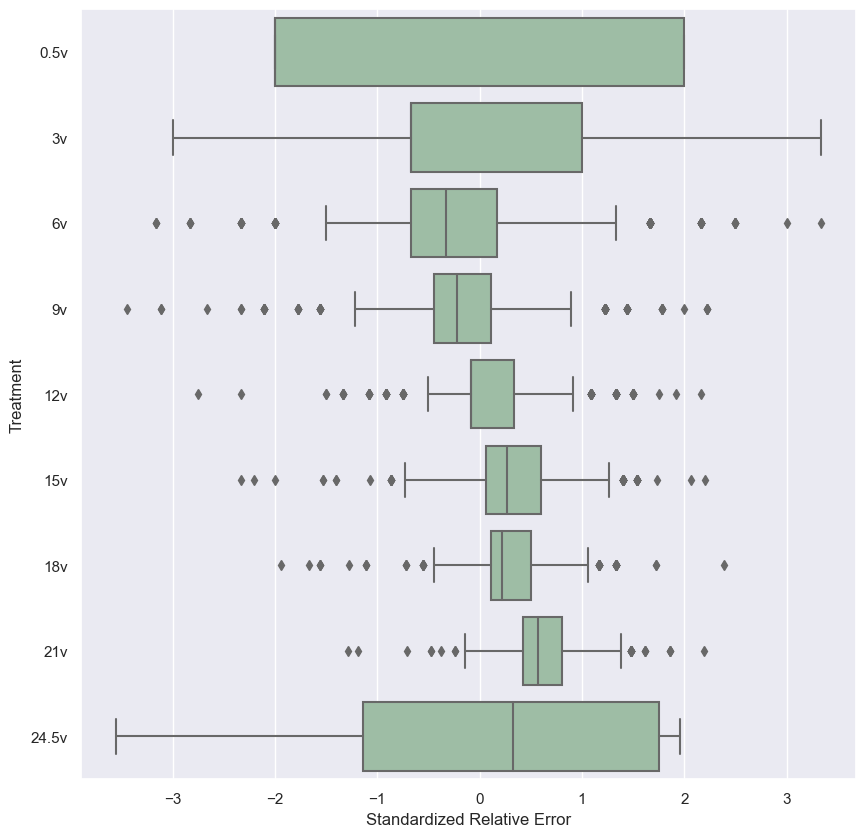

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt_remove, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based whole Population.png')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

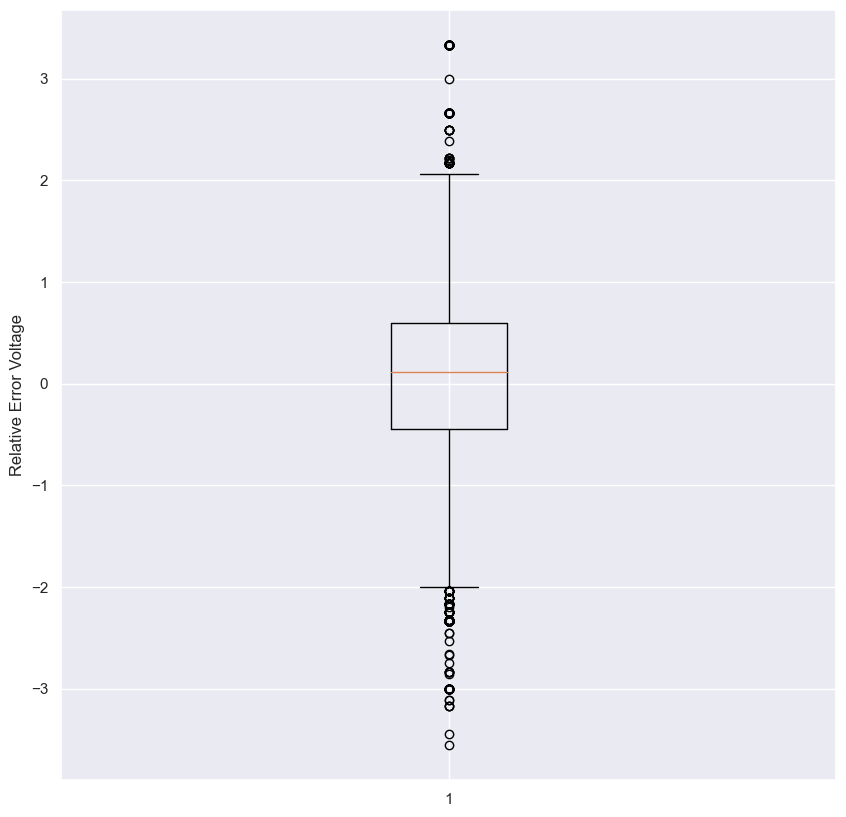

In [27]:
plt.boxplot(df_melt_remove['value'])
plt.ylabel('Relative Error Voltage')